# Project: Investigate a Dataset (TMDb_Movies Dataset)

## Introduction


### Overview
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Questions:
- Which year has the highest release of movies?
- Which Month Released Highest Number Of Movies In All Of The Years
- More budget = longer runtime?
- more budget = longer runtime?¶
- Wich length of movies is liked most by audiences according to their popularity
- Which Genre Has The Highest Release Of Movies?
- Frequent cast

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Data Wrangling

In [13]:
df = pd.read_csv('tmdb-movies.csv')

In [14]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:
df.shape

(10866, 21)

In [16]:
#check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [17]:
sum(df.duplicated())

1

In [18]:
# 1 duplicate has sbeen found

In [19]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [20]:
#data has null values so we count total rows in each column which contain null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

# Data Cleaning

In [21]:
# Drop columns that won’t be used in our analysis
df.drop(columns = ['tagline','homepage', 'keywords'], inplace=True)


In [23]:
#use means to fill in missing values
df.fillna(df.mean(),inplace=True)

/tmp/ipykernel_7308/2508532373.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(),inplace=True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   director              10822 non-null  object 
 8   overview              10862 non-null  object 
 9   runtime               10866 non-null  int64  
 10  genres                10843 non-null  object 
 11  production_companies  9836 non-null   object 
 12  release_date          10866 non-null  object 
 13  vote_count            10866 non-null  int64  
 14  vote_average          10866 non-null  float64
 15  release_year       

In [42]:
 #Drop the missing value at genres columns
df.dropna(how='any', subset=['genres'], inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   director              10822 non-null  object 
 8   overview              10862 non-null  object 
 9   runtime               10866 non-null  int64  
 10  genres                10843 non-null  object 
 11  production_companies  9836 non-null   object 
 12  release_date          10866 non-null  object 
 13  vote_count            10866 non-null  int64  
 14  vote_average          10866 non-null  float64
 15  release_year       

In [26]:
df.dropna(inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9771 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9771 non-null   int64  
 1   imdb_id               9771 non-null   object 
 2   popularity            9771 non-null   float64
 3   budget                9771 non-null   int64  
 4   revenue               9771 non-null   int64  
 5   original_title        9771 non-null   object 
 6   cast                  9771 non-null   object 
 7   director              9771 non-null   object 
 8   overview              9771 non-null   object 
 9   runtime               9771 non-null   int64  
 10  genres                9771 non-null   object 
 11  production_companies  9771 non-null   object 
 12  release_date          9771 non-null   object 
 13  vote_count            9771 non-null   int64  
 14  vote_average          9771 non-null   float64
 15  release_year        

In [28]:
df.duplicated().sum()

1

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.duplicated().sum()

0

In [48]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,91981.355752,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.250000,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20557.000000,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75186.000000,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [49]:
# count the budget columns have value less than 0
(df['budget'] <= 0).sum()

5674

#### 
There are 5674 columns less than 0 in budget columns

#### 
More than half of the records in the budget has missing, this will reduce our result accuracy when exploring the relationship between budget, revenue, and net profit. We will exclude them during the analysis when we need to use the budget information

In [33]:
 #the given in the dataset is in string format.
#So we need to change this in datetime format
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

## Exploratory Data Analysis

#### Research Questions

-  Which year has the highest release of movies?
- Which Month Released Highest Number Of Movies In All Of The Years
- More budget = longer runtime?
- more budget = longer runtime?¶
- Wich length of movies is liked most by audiences according to their popularity
- Which Genre Has The Highest Release Of Movies?
- Frequent vcast

#### 1. Which year has the highest release of movies?

In [34]:
#count the number of movies in each year 
data=df.groupby('release_year').count()['id']

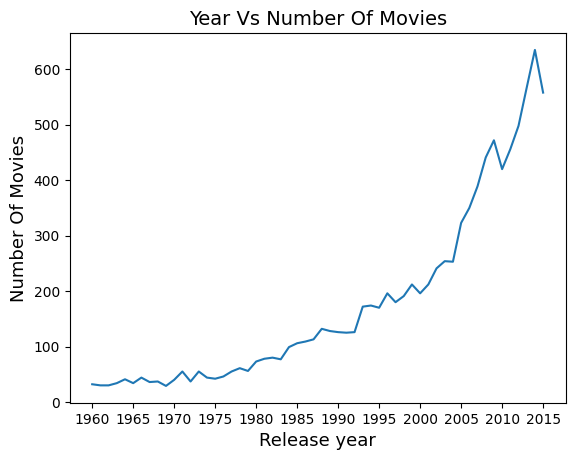

In [35]:
data.plot(xticks = np.arange(1960,2016,5))
sns.set(rc={'figure.figsize':(14,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

* 2014 has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).

#### 2.Which Month Released Highest Number Of Movies In All Of The Years

In [37]:
number_of_release=df['release_date'].dt.month.value_counts().sort_index()
number_of_release

1      745
2      628
3      739
4      724
5      741
6      766
7      714
8      842
9     1203
10    1036
11     736
12     896
Name: release_date, dtype: int64

Text(0, 0.5, 'Number of movie releases')

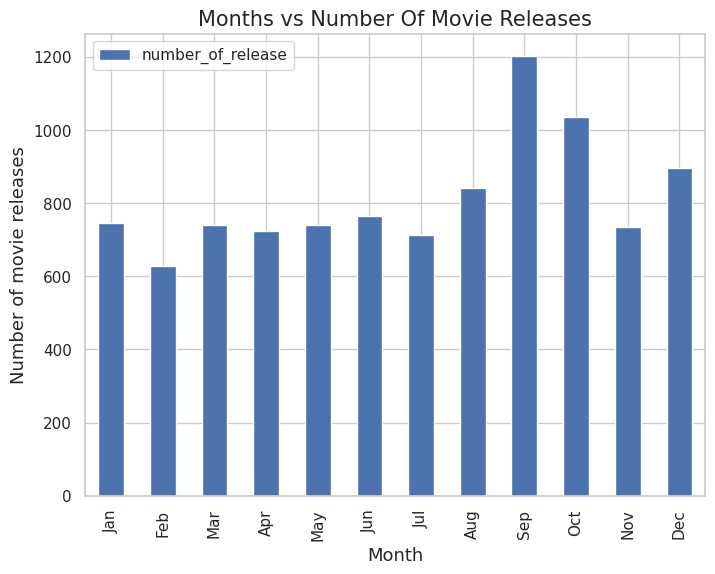

In [38]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months
#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))
#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)

- we can conclude from the plot that there are higher number of release in september and october month.

#### 3. more budget = longer runtime?

In [39]:
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) /y.std(ddof=0)
    
    return (std_x *std_y).mean()

In [40]:
correlation(df['budget'], df['runtime'])

0.21417688790512807

<AxesSubplot: xlabel='budget', ylabel='runtime'>

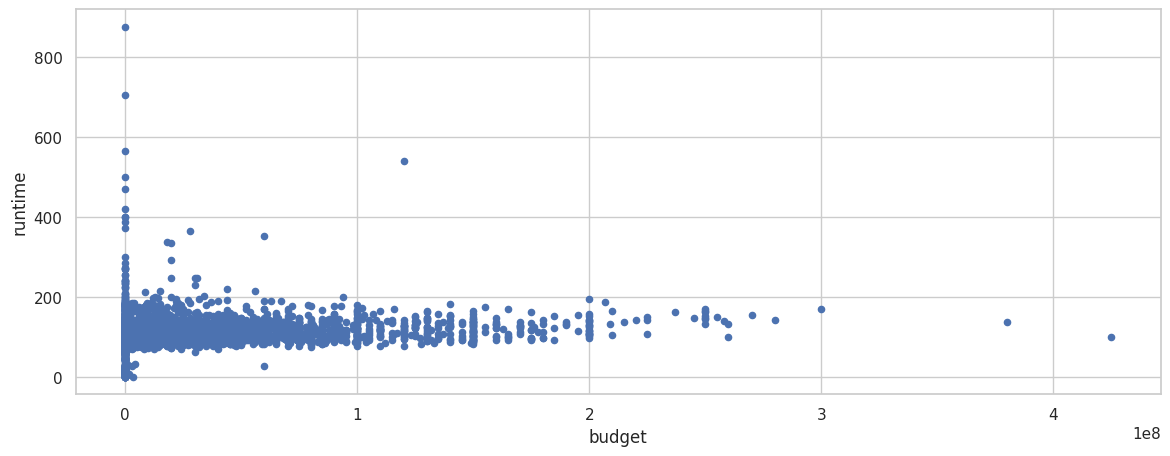

In [41]:
df.plot(x="budget", y="runtime", kind="scatter")

- The more budget was available, the longer the film would last

#### 4.more budget = more revenue?

In [42]:
correlation(df['budget'], df['revenue'])

0.7311950662258841

<AxesSubplot: xlabel='budget', ylabel='revenue'>

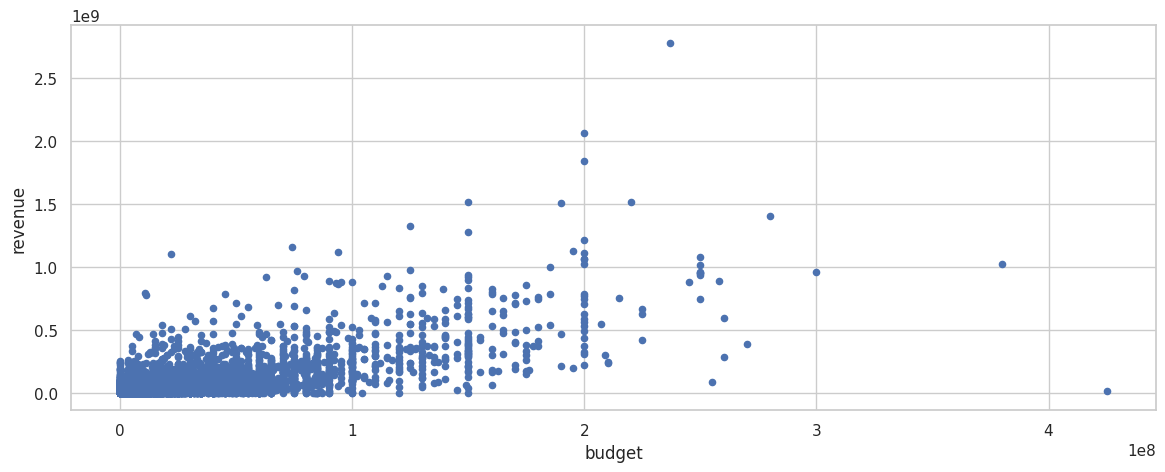

In [43]:
df.plot(x="budget", y="revenue", kind="scatter")

-  A positive correlation
-  If more budget is available, the profit will be higher

#### 5. of movies liked most by audiences according to their popularity

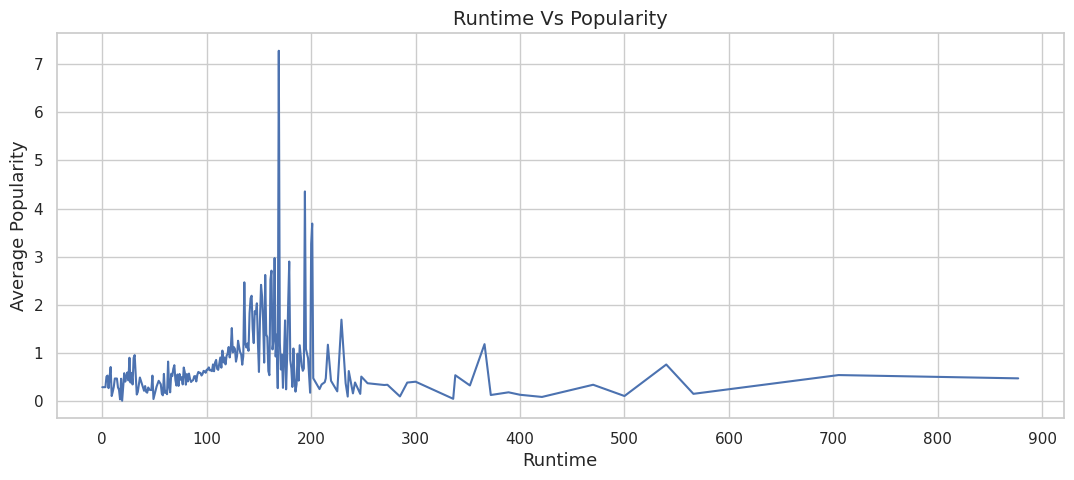

In [44]:
#make the group of the data according to their runtime and find the mean popularity related to this and plot.
df.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))

#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)
#setup the figure size.
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")

- length of movies between 100 and 200 runtime are more popular.

#### movie wich generated the highest revenue

In [62]:
df.sort_values('revenue',ascending=False).head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09


#### 7.Which Genre Has The Highest Release Of Movies?

In [70]:
#make a function will will split the string and return the count of each genre.
def data(x):
    #concatenate all the rows of the genrs.
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

In [71]:
total_genre_movies = data('genres')
print(total_genre_movies)

Drama              4364
Comedy             3433
Thriller           2746
Action             2233
Romance            1570
Horror             1526
Adventure          1384
Crime              1299
Science Fiction    1134
Family             1095
Fantasy             839
Mystery             773
Animation           615
Music               339
Documentary         317
History             306
War                 258
Western             160
TV Movie            132
Foreign             120
dtype: int64


Text(0, 0.5, 'Genres')

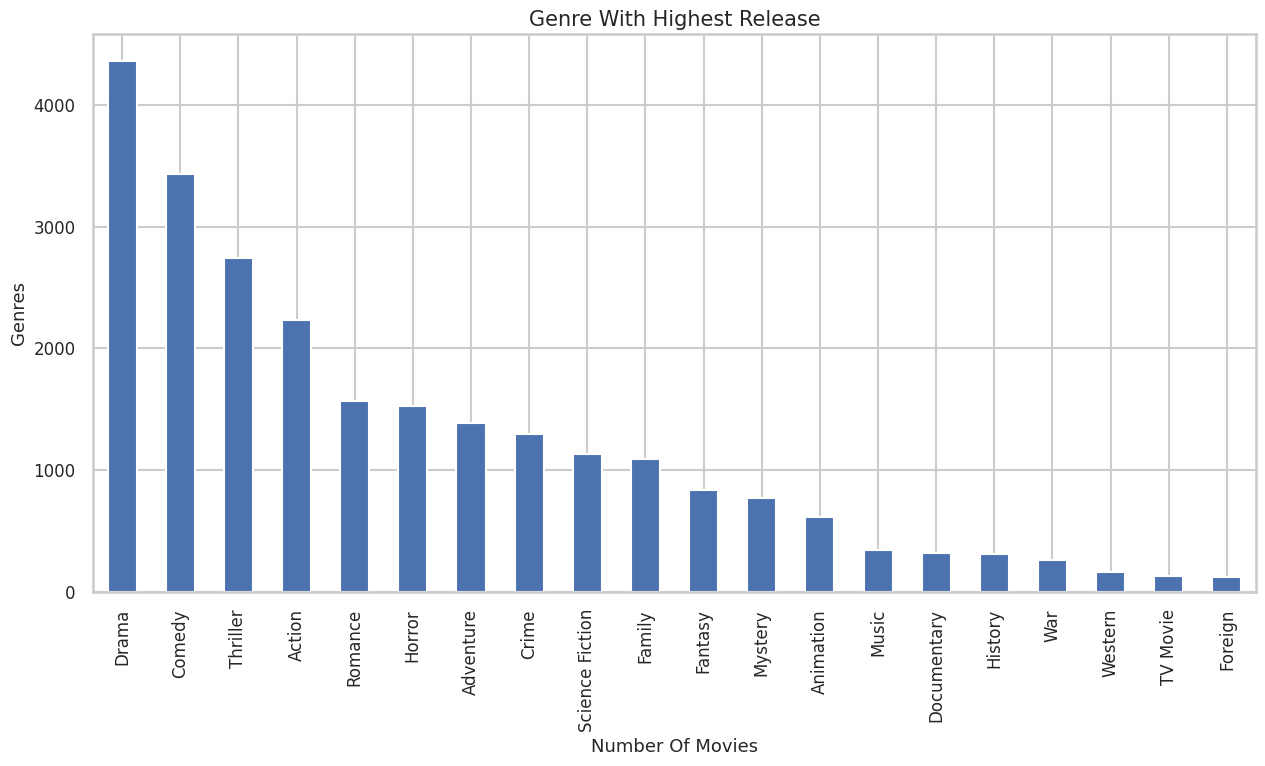

In [72]:
#plot a 'bar' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'bar',figsize = (13,8),fontsize=12)
#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)

#### 8. Frequent cast

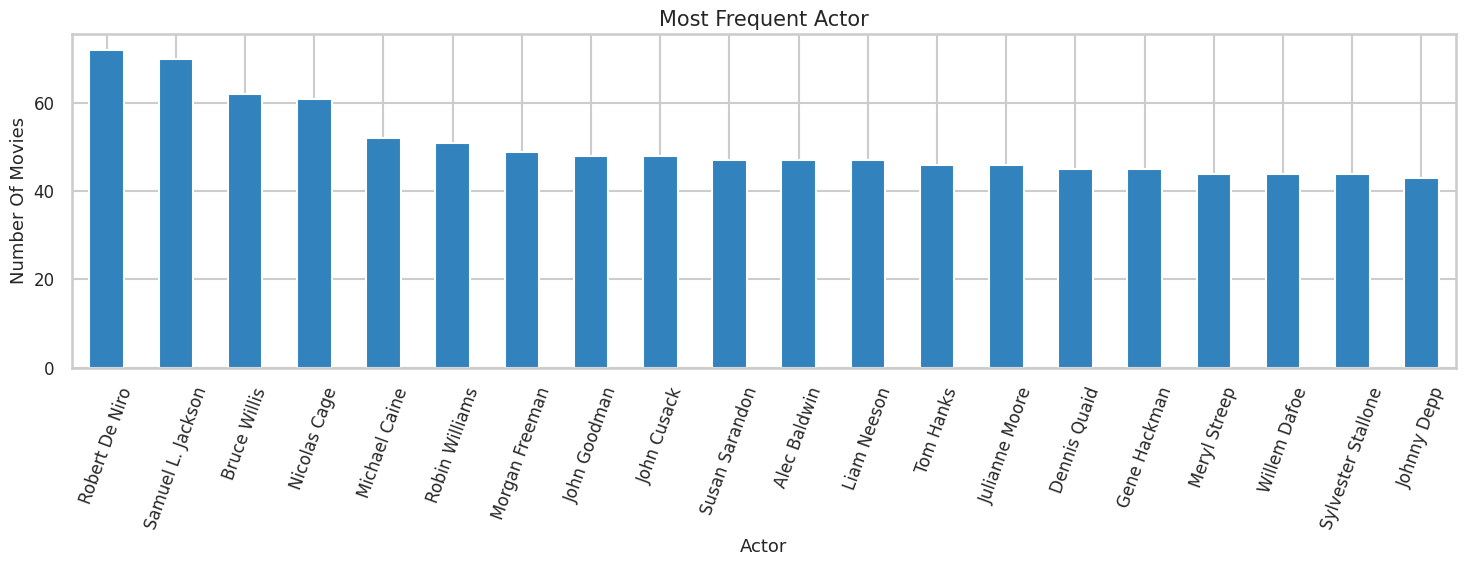

In [73]:
count_actor_flims = data('cast')

#plot the barh plot.
count_actor_flims.iloc[:20].plot.bar(figsize=(15,6),colormap= 'tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

#### Conclusions
- 2014 has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).
- There are higher number of release in september and october month.
- If more budget is available,the film would last longer
- Robert De Nitro is the most frequent actor
- Drama Genre has the highest release of movies(4364)
- Avatar Movie generated the highest revenue
- length of movies between 100 and 200 runtime are more popular.
-  more budget is available, the profit will be higher
- 

#### Limitations

- we are not sure if the data provided to us is completel corect and up-to-date.
- Budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong.
- There were multiple genres in each movie, hence we split the genres such that each genre is allocated to 1 row.